# review 2

- 사이킷런으로 시작하는 머신러닝

In [1]:
import sklearn

C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ehfus\Anaconda3\envs\dv2021\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


- 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기
  - 붓꽃 데이터 세트로 붓꽃의 품종을 분류해보자
  - 분류는 대표적인 지도학습 방법의 하나이다. 
  - 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다. 
  - 즉, 지도학습은 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식이다. 

- iris의 key
  - data : 샘플 데이터, ndarray로 이루어져 있다(각 feature의 값 배열)
  - target : Label 데이터, ndarray로 이루어져 있다
  - feature_names : Feature 데이터의 이름(특징 이름 정도라고 생각하면 될 것 같가.)
  - target_names : Label 데이터
    - target이 숫자로 치환돼 있어서 그것에 해당하는 실제 이름이다.
  - DESCR : 데이터 셋의 설명
  - filename : 데이터 셋의 파일 저장 위치

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 트리 기반 ML 알고리즘 구현한 클래스 모임 모듈
from sklearn.model_selection import train_test_split
import pandas as pd

# 붓꽃 데이터 세트를 로딩
# from sklearn.datasets import load_iris 선이행 돼야 함
iris = load_iris()
# DICT 형태로 되어있다.
# 구체적으로 말하면 DICT형태는 아니고, sklearn.utils.Bunch형태임
# DICT과 유사한 형태, sklearn 빌트인 데이터 셋은 이 자료구조를 사용함

# key와 value 형태로 되어있음


# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
# DICT 꼴에서 특정 키를 불러오는 방법 기억해두자
iris_data = iris.data # ndarray로 저장돼있다. 


# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target
# 각 feature들을 종합한 결과?라고 생각하면 될 것 같다.
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
# sklearn.utils.Bunch 형태(그 안의 값들은 ndarray로 이루어져 있고, 이 ndarray들을 
# 이용해서 pd.DataFrame으로 변환해주자. 가독성을 위해서)
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
# DataFrame 생성할 때, columns 생성해주는 방법 기억해두자
iris_df['label'] = iris.target # label 칼럼 새로 생성해주었음
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
# iris
# key와 value 형태로 되어있음을 확인할 수 있다. 
# 가독성을 위해서 따로 추출한 뒤 pd.DataFrame으로 변환해주었다. 

- 이어서 다음 날

---

- 학습용 데이터와 테스트용 데이터를 분리.

In [6]:
# from sklearn.model_selection import train_test_split
# iris_data = iris.data
# iris_label = iris.target
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2,random_state=11)
# random_state = 11 -> 호출할 때마다 같은 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값.
# X_train, X_test, y_train, y_test = 학습 데이터, 테스트 데이터, 학습 레이블, 테스트 레이블

- 의사 결정 트리를 이용해 학습과 예측을 수행해보자

In [7]:
# DecisionTreeClassifier 객체 생성
# from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
# 여기선 굳이 random_state = 11값 설정해도 계속 random하게 값들이 산출된다.
# 학습 데이터 셋과 테스트 데이터 셋을 분리해줄 때 random_state 값을 선정해주는 게 의미가 있어보인다. 

# DecisionTreeClassifier 객체의 fit() 메서드에 학습용 feature 데이터 속성과 결정값 label 데이터 세트를 입력해 호출하면 학습을 수행한다.
# 학습 수행중
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

- 학습 완료되었음
- DecisionTreeClassifier의 객체인 dt_clf가 학습 완료됐기에, dt_clf의 메서드 중 predict를 이용하여 예측을 수행한다.
- 예측 수행해보자
  - 이때 예측은 반드시 `학습데이터가 아닌 다른 데이터를 이용`해야 하며, `일반적으로 테스트 데이터 세트를 이용`한다. 

In [8]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)
# 따로 분리해두었던 feature 값들만 넣어주는 것이다. 
# label은 dt_clf.predict에서 예측할 것이기 때문에 넣어줄 필요가 없다.

In [9]:
# 예측 결과
pred

array([2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 2])

- 예측 결과 기반으로 의사 결정 트리 기반의 예측 성능을 평가해보자
- 여러가지 성능 평가 방법 중 정확도(label분포가 불균형한 이진 분류에선 정확도지표는 지양해야한다)를 측정해보자
  - 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표.
  - 즉 pred의 값과 y_test가 얼마나 일치하는지 확인하는 절차가 될 것

In [10]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:4f}'.format(accuracy_score(y_test,pred)))
# 인자 값으로 실제 label 값인 y_test와 예측한 pred를 넣어준다. 

예측 정확도: 0.866667


---

- 절차
  - 1) 데이터 세트 분리
  - 2) 모델 학습
    - 객체 생성
    - 분리된 학습 데이터 셋을 통해 학습시켜주기
  - 3) 예측 수행
    - X_test를 넣어서 예측 수행하고, 그 값을 pred에 저장
  - 4) 평가(예측된 결괏값과 테스트 레이블 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다)
    - accuracy_score(y_test,pred)를 통해 정확도 측정

---

- 사이킷런의 기반 프레임워크 익히기
  - 사이킷런은 ML 모델 학습을 위해서 fit()
    - dt_clf.fit(X_tarin, y_train)
  - 학습된 모델의 예측을 위해 predict()
    - dt_clf.predict(X_test)
  - 지도학습의 주요 두 축인 분류와 회귀의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 학습과 예측 결과를 반환할 수 있다. 

----

- Classifier와 Regressor를 합쳐서 Estimator 클래스라고 부른다. 
- 즉, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator라고 부른다. 따라서 당연히 Estimator 클래스는 fit()과 predict()를 내부에서 구현하고 있다. 

---

> 추후 학습

- ***cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받는다. 인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것이다.***

- 사이킷런에서 비지도학습인 차원 축소, 클러스트링, 피처 추출 등을 구현한 클래스 역시 대부분 fit(), transform()을 적용한다. 
  - 비지도 학습과 피처 추출에서 fit()은 지도학습에서의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업이다.
  - fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스트링, 피처 추출 등의 실제 작업은 transform()으로 수행한다. 
  - 사이킷런은 fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공한다. (함께 사용하는만큼 주의가 필요.)

---

- 사이킷런의 주요 모듈

```python
sklearn.datasets # 사이킷런에 내장돼 있는 예제로 제공하는 데이터 세트
# from sklearn.datasets import load_iris
sklearn.preprocessing # 데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
.
.
.
```
그 외의 다양한 모듈들에 대해서는 교재 94p를 참고한다. 

- 일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 (피처의 가공, 변경, 추출을 수행하는 ***피처 처리***), (ML 알고리즘 ***학습/예측 수행***), 그리고 (***모델 평가***)의 단계를 반복적으로 수행하는 것.

---

- 분류와 클러스트링을 위한 표본 데이터 생성기
```python
datasets.make_classifications() # 분류를 위한 데이터 세트를 무작위로 생성
datasets.make_blobs() # 클러스트링을 위한 데이터 세트를 무작위로 생성
```
- 사이킷런에 내장된 이 데이터 세트는 일반적으로 딕셔너리 형태로 돼 있다.
  - sklearn.utils.Bunch 형태
  - 키는 보통 data, target(분류 시 레이블 값, 회귀 시 숫자 결괏값 데이터 세트), target_name(개별 레이블 이름), feature_names, DESCR(데이터 세트에 대한 설명과 각 피처의 설명, dataset에 대한 설명)로 구성돼 있다. 
  - data, target은 넘파이 배열(ndarray)
    - pd.DataFrame으로 변환시킬 수 있다.
    ```python
    iris_df = pd.DataFrame(data = iris_data, columns = iris_target)
    ```
  - 나머지는 넘파이 배열 또는 파이썬 리스트 타입, DESCR(dataset에 대한 각종 설명)은 스트링 타입

---

- feature의 데이터 값을 반환하기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key 값을 지정하면 된다.
  - 예제를 통해 알아보자

In [11]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


In [12]:
keys = iris_data.keys()
# key확인하는 방법
print('붓꽃 데이터 세트의 키 : ', keys)

붓꽃 데이터 세트의 키 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [13]:
iris_feature = iris_data.data
# iris_feature

---

- Model Selection 모듈 소개
  - 학습 데이터와 테스트 데이터 세트를 분리
  - 교차 검증 분할 및 평가
  - Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스를 제공

- 학습/테스트 데이터 세트 분리 - train_test_split()

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data # 타겟은 제외, feature 값들만 모은 것
train_label = iris.target # 타겟
# 이렇게 분리해야 다음과 같이 학습할 수 있다. 
dt_clf.fit(train_data, train_label)

# ***학습 데이터 세트***로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도 : ', accuracy_score(train_label, pred))

예측 정확도 :  1.0


- 정확도 100%
  - 위의 이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문이다.
    - 모의고사 답을 알고 있는 상태에서 동일 모의고사를 또 본 것.
    - 그래서 sklearn.model_selection 모듈에서 train_test_split을 로드해야 한다.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier() # 객체 생성
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = .3, random_state=121)
# 추가적인 파라미터 : shuffle = True(가 디폴트) : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정, 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용된다.

- 학습 데이터를 기반으로 학습 후 예측해보자

In [16]:
dt_clf.fit(X_train, y_train) # 학습
pred = dt_clf.predict(X_test) # 예측
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


---

- 교차 검증(부제 : 다양한 모의고사 수행)
  - 모델이 일부 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 `과적합` 방지.
  - 데이터 편증 방지
  - 큰 덩어리를 여러 덩어리로 쪼개고, 그 여러 덩어리에서도 역할을 계속 달리해줌으로써 학습해보자
  - 재활용을 효율적으로 해보자

- K 폴드 교차 검증은 가장 보편적으로 사용되는 교차 검증 기법
  - 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가(1차적인 평가)를 반복적으로 수행
  - K번 평가를 수행 뒤, 평균한 결과를 가지고 예측 성능을 평가.
  - 예를 들어 K=5라면, 데이터를 5등분하고, (이해의 편의를 위해 번호매긴다면) 첫 번째 평가는 5번 덩어리, 두 번째 평가는 4번 덩어리..이런식으로 5번 반복!

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold # 이 모듈에 아까 train_test_split 함수도 있었음
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits = 5) # KFold 객체
cv_accuracy = []  # 폴드 세트별 정확도를 담을 리스트 객체 생성
print('붓꽃 데이터 세트 크기: ', features.shape[0])

붓꽃 데이터 세트 크기:  150


In [18]:
features.shape

(150, 4)

In [19]:
kfold.split(features)

<generator object _BaseKFold.split at 0x0000029F77133820>

- generator object
  - generator : iterator를 생성해주는 함수, 함수안에 yield 키워드를 사용함
  - genrator 특징
    - iterable한 순서가 지정됨(모든 generator는 iterator)

- *******추가 학습 필요*******
  - kfold.split(features)의 반환 결과를 살펴보니 generator object이다.
  - iterator와 관련돼 있는 것 같고
  - 이는 for loop과 관련돼 있는 것으로 보인다.
  - 이렇게 자신이 공부하다 추가적으로 공부하게 된 부분이나 팀원들도 이런 부분 알면 좋을 것 같다는 것 정리해서 오면 도움이 많이 될 듯

In [29]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 row 인덱스를 array로 반환해줌!  
for train_index, test_index  in kfold.split(features):
    # kfold.split(features) 반환결과가 train_index, test_index 이 형태!
    
    # kfold.split( )으로 반환된 인덱스를 이용하여! 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 이때, y_test는 정확도 평가할 때 쓰일 것.
    
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train) # 학습    
    pred = dt_clf.predict(X_test) # 예측 결과를 pred에 저장
    n_iter += 1 
    
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    
    cv_accuracy.append(accuracy)
    # list 원소 추가 함수 [].append(!!)
    
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


In [31]:
from sklearn.model_selection import KFold
# train_test_Split 메서드도 이 모듈에 있었음

kfold = KFold(n_splits = 5)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차 검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

##교차 검증:1
학습 레이블 데이터 분포:
 1    50
2    50
0    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    30
Name: label, dtype: int64
##교차 검증:2
학습 레이블 데이터 분포:
 2    50
1    40
0    30
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    20
1    10
Name: label, dtype: int64
##교차 검증:3
학습 레이블 데이터 분포:
 0    50
2    50
1    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    30
Name: label, dtype: int64
##교차 검증:4
학습 레이블 데이터 분포:
 0    50
1    40
2    30
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    20
1    10
Name: label, dtype: int64
##교차 검증:5
학습 레이블 데이터 분포:
 0    50
1    50
2    20
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    30
Name: label, dtype: int64


- 검증 시마다 검증 세트의 인덱스가 달라짐을 알 수 있다.

---

- Stratified K 폴드
  - #### `불균형한 분포도(특정 레이블 값이 특이하게 많거나 적어, 분포가 한쪽으로 치우치는 것)를 가진 레이블 데이터 집합을 위한 K폴드 방식`.
  - #### `원본 데이터와 유사한 레이블 값의 분포를 학습/테스트 세트에도 유지하는 게 매우 중요`
    - 이를 위해, Stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분해한다.

In [2]:
import pandas as pd

from  sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

----

#### 중요
- 위에서 KFold 진행할 땐, features를 분리했었음(label이 아니라)
  - 사실 위에서는 5개의 폴드로 나눠서 50개로 나눌 때보단 문제가 안 됐던 것 같음
  - 위의 결과도 보면 검증 데이터 인덱스가 순서대로 이루어져 있어서 한 덩어리당 동일한 label이 이미 많이 포진되어 있음

---

In [30]:
from sklearn.model_selection import KFold
# train_test_Split 메서드도 이 모듈에 있었음

kfold = KFold(n_splits = 3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차 검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

##교차 검증:1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
##교차 검증:2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
##교차 검증:3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


- 모든 폴드가 0,1,2 골고루 학습해야하지만, 계속 한 레이블은 아예 배제되고 있다. 그렇다면 배제된 그 레이블은 학습이 전혀 안 되고 절대 예측할 수 없다. 
- 그래서 StratifiedKFold가 필요.
  - ***레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요하다.***

In [96]:
from sklearn.model_selection import StratifiedKFold
# 여기에 train_test_split, KFold도 있었음

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']): 
    # iris_df['label'] 이거 꼭 필요!
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포: 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포: 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포: 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64


- 이렇게 학습레이블과 검증레이블 데이터 값의 분포가 동일하게 할당되어야 한다
- 이제 교차 검증 수행해보자

In [97]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=156)
features = iris.data
label = iris.target

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[] # 각 폴드별 정확도 담을 list 생성

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    # stratifiedKFold는 label도 필수!
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    dt_clf.fit(X_train , y_train) # 학습 중    
    pred = dt_clf.predict(X_test) # 예측 중

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4) # 정확도 측정 중
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


----

- 왜곡된 레이블 데이터 세트에서는 반드시 StratifiedKFold를 이용해 교차 검증해야 한다. 
- 사실, 일반적으로 분류에서의 교차 검증은 K 폴드가 아니라 StratifiedKFold로 분할돼야 한다. 
  - 회귀에서는 StratifiedKFold가 지원되지 않는다. (회귀의 결정값은 이산이 아닌 연속. 결정값별로 분포를 정하는 의미가 없음)

---

- 교차 검증을 보다 간편하게 해주는 API에 대해 알아보자
  - cross_val_score()는 분류일 땐 StratifiedKFold, 회귀일 땐 KFold로.
  - 사용법에 대해 알아보자

In [14]:
from sklearn.tree import DecisionTreeClassifier # estimator 중 DecisionTreeClassifier 사용
from sklearn.model_selection import cross_val_score , cross_validate
# 이 모듈 <- train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate가 들어있음
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개(cv = 3) 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy', cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- cross_val_score() API는 내부에서 Estimator를 학습, 예측, 평가 시켜주므로 간단하게 교차검증(과적합 방지)을 수행할 수 있다. 
- 정확도도 위위셀에서의 StratifiedKFold 정확도와 일치함, cross_val_score(분류일 땐 알아서 StratifiedKFold 수행한다)가 내부적으로 StratifiedKFold를 사용하기 때문에

---

- cross_val_score와 비슷한 cross_validate가 있다.
  - 다만 cross_validate는 여러 개의 평가 지표를 반환할 수 있다. 그리고 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공한다. 

---

- 하이퍼 파라미터 튜닝 맛보기 
  - GridSearchCV : 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
  - 하이퍼 파라미터 : 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다.

- GridSearchCV는 교차 검증을 기반으로 이 하이퍼 파라미터의 최적 값을 찾게 해준다.

In [15]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier() # 데이터 분리에서 random_state = 121, 설정해줘서 모델 객체 생성시 seed값 재설정 안 해주는 듯

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth' : [1, 2, 3], 'min_samples_split' : [2,3]}
# 하이퍼 파라미터 명칭은 문자열 key 값으로, 하이퍼 파라미터의 값은 list형으로 생성한다. 

In [17]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, (검증)test set fold 로 나누어서 테스트 수행 설정.  
# refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴. 
# re,fit 말 그대로 다시 fit
# return_train_score=True -> 훈련 점수 포함 여부 
# 객체 생성 중
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)
# cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받는다. 
# 여기서는 dtree = DecisionTreeClassifier()를 인자로서 받았다. 
# 인자로 받은 Estimator에 대해서(여기서는 dtree) cross_val_score(), GridSearchCV.fit() 함수 내에서 
# 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것이다.***




# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


- 4 row가 1등.
- 이때 파라미터가 최적의 하이퍼 파라미터임을 알 수 있다. 
- mean_test_score는 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다. 

In [19]:
# grid_dtree.cv_results_

In [22]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_dtree.predict(X_test) # 예측
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) # 이건 검증 데이터 세트가 아니라 별도의 최종 테스트 데이터 세트임

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667


---

---

---

---

---

- 데이터 전처리
  - Null, NaN 값 처리
    - 파이썬에서 Null, NaN값이 의미하는 건 미세하게 다름
    - R에선 NA임
  - 문자열 값 처리(by encoding)

- data encoding
  - Label encoding
  - One-Hot encoding

----

- Label encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder() # 객체 생성
encoder.fit(items) # 사전 구조 맞추는 작업정도로 생각하면 될듯.
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [5]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


- 순서대로 0,1,2,3,4,5이다.

In [6]:
print('디코딩하여 원본값 확인 :' ,encoder.inverse_transform([4,5,5,4,5,2,1,0,0]))

디코딩하여 원본값 확인 : ['전자렌지' '컴퓨터' '컴퓨터' '전자렌지' '컴퓨터' '믹서' '냉장고' 'TV' 'TV']


- label encoding ***`### 주의`***
  - TV의 숫자코드는 0, 컴퓨터의 숫자코드는 5
  - 이때 ML알고리즘에서 컴퓨터(숫자코드 5)를 더 중요하게 인식할 가능성이 발생
    - `해결책 : One-Hot Encoding`
    - **주의** : One-Hot Encoding으로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다.
      - (후에 언급하겠지만 사실 pandas의 내장함수기능, get_dummies을 이용하면 간단하게 해결이 가능하다)
      - 이때 LabelEncoder를 사용함
    - **주의** : 입력 값으로 2차원 데이터가 필요하다.
      - reshape 함수를 이용한다.
  - 따라서 label encoding은 선형회귀와 같은 ML 알고리즘에는 적용 X
    - 숫자 코드 5를 더 중시할 수 있는 가능성이 있기 때문에
  - 트리계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 label encoding도 문제 없다. 

In [10]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

In [11]:
labels
# 현재는 1차원 데이터이다. 
# 2차원 데이터로 변경해준다.
# labels.reshape(-1,1)
# 1열로 배열 
# 몇행이 될진 몰?루

array([0, 1, 4, 5, 3, 3, 2, 2], dtype=int64)

In [12]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환합니다. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# labels는 ndarray임

# 2차원 데이터로 변환합니다.
# numpy 함수 중 reshape 사용
labels = labels.reshape(-1,1)
# reshape(-1,1)
# 행은 상관하지 않고, 무조건 1열로 만들겠다.
# 만약 reshape(-1,2)
# 이렇게 쓰면, 행은 상관하지 않고 무조건 2열로 만들겠다
# 이때 만약 행열 차원이 맞지 않으면 error뜨던가..
# 아니면 broadcasting으로 알아서 채워질 것이다.



# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
# oh_labels의 type은 scipy.sparse.csr.csr_matrix


print('원-핫 인코딩 데이터')
print(oh_labels.toarray()) # ndarray로 변환 !
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [17]:
oh_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [18]:
print(oh_labels)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


- [희소행렬과 그것의 변환에 관한 설명 ref](https://radish-greens.tistory.com/1)

- 대충 보니
- 희소 행렬 표현임
- 그런데 또 희소 행렬에서 더 나아가서 그것을 압축한 희소행렬 표현임
  - 왜?
    - 대용량의 데이터를 효과적으로 저장,전달하기 위해 사용하곤 함
    - 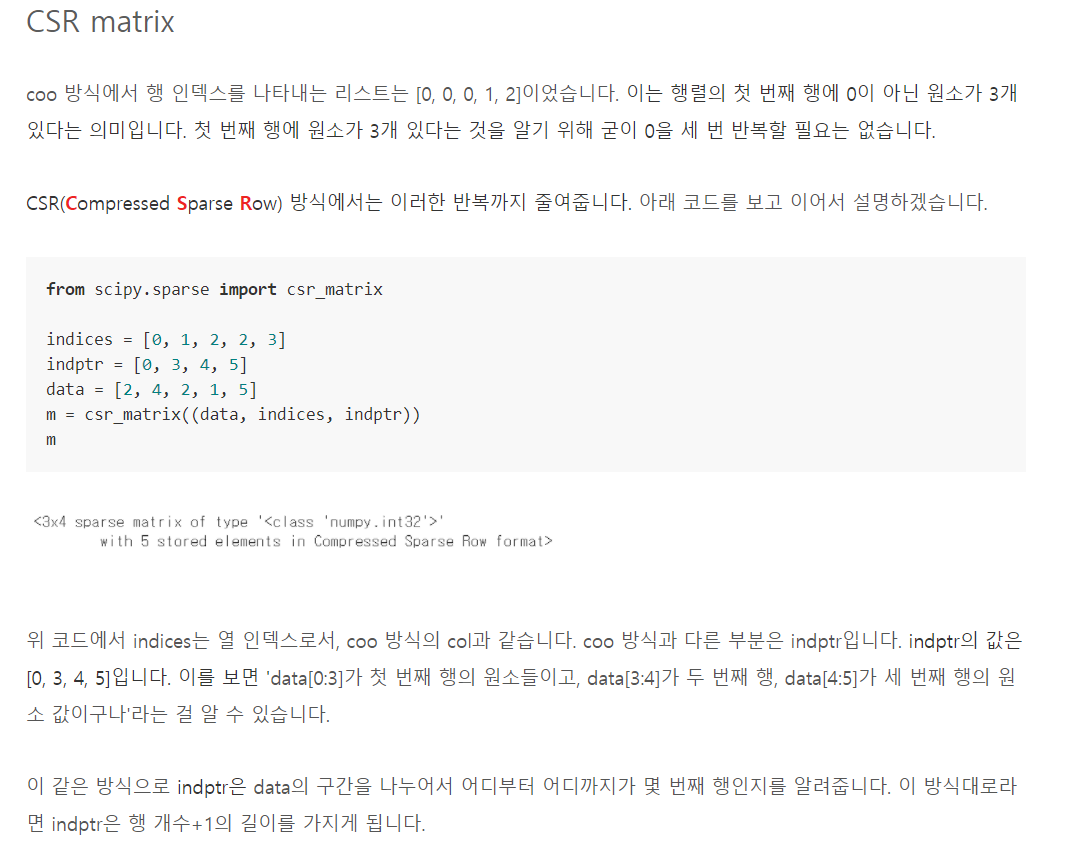
    - 이 희소행렬을 .toarray()를 사용해서 ndarray 형태로 변환해줄 수 있음
    - .toarray()가 ndarray로 변환해주는 기능은 맞지만 어떤 형태의 data에나 사용할 수 있는 건 아니고
    - SciPy의 희소행렬 형태에만 사용할 수 있는 것으로 보임

- pandas의 get_dummies()를 이용하여 원-핫 인코딩을 더 손 쉽게 수행해보자
  - LabelEncoder 이용해서 숫자형으로 변환할 필요 없이 바로 변환할 수 있다. 

In [19]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [38]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


---

- 이어서 다음 날

- 피처 스케일링과 정규화
  - ####  `피처 스케일링` : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업, `표준화`와 `정규화`가 있다. 
  - 각 피처를 평균이 0이고, 분산이 1인 가우시안 정규분포를 가진 값으로 변환하는 것
  - 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것

- 사이킷런에서의 정규화는 선형대수에서의 정규화 개념이 적용됨.
  - 개별 벡터를 모든 피처 벡터의 크기로 나눠준다.
  - 이 개념을 `벡터 정규화`라 칭하자

- 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신(이하 SVM), 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다. 

In [26]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환한다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)

print('\n\nfeature들의 평균 값:\n',iris_df.mean())
print('\n\nfeature들의 분산 값:\n',iris_df.var())
# pd.DataFrame에서 그냥 바로 mean()같은 함수 사용 가능!



feature들의 평균 값:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


feature들의 분산 값:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


- 표준화하여 평균과 분산이 각각 0,1로 변환되는지 확인해보자

In [31]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출. 
scaler.fit(iris_df) 
# fit은 데이터 변환을 위한 기준 정보 설정 (예를 들어 데이터 세트의 최솟값/최댓값 설정 혹은 평균과 분산 설정 등)

iris_scaled = scaler.transform(iris_df) 
# transform은 이렇게 설정된 정보를 이용해 데이터를 변환한다. 
# transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환됨
# 이를 다시 DataFrame으로 변환

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean()) # 이런 기능 이용하려면 pd.DataFrame이 편하다
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var()) # 이런 기능 이용하려면 pd.DataFrame이 편하다

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐음을 확인할 수 있다. 

---

- MinMaxScaler
  - 데이터값을 0과 1사이의 범위 값으로 변환한다. 
  - 만약 음수값이 일부 존재한다면 데이터 값을 -1과 1사이의 범위 값으로 변환한다. 
  - 데이터의 분포가 가우시안 분포가 아닐 경우에 MinMaxScaler를 적용해 볼 수 있다. 

In [13]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- 모든 칼럼에 0에서 1사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있다. 

### ***`주의`***
  - 학습 데이터 세트와 테스트 데이터 세트에 이 fit()과 transform()을 적용할 때 주의가 필요
  - Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 한다. 
  - 즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며, 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다. 

- 테스트 데이터에 fit()을 적용할 때 생기는 문제점에 대해 알아보자

- 일단 학습 데이터를 변환해보자

In [26]:
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit()과 transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변환해야 한다.
train_array = np.arange(0,11).reshape(-1,1) # 1열로 배열
test_array = np.arange(0,6).reshape(-1,1) # 1열로 배열

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 데이터 : ', np.round(train_array.reshape(-1),2))
print('scaled 데이터 : ', np.round(train_scaled.reshape(-1),2))

원본 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
scaled 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


- 이제 테스트 데이터에 fit을 적용하여 테스트 데이터도 변환해보자

In [32]:
scaler.fit(test_array) # 테스트 데이터에도 새롭게 fit을 수행 中
test_scaled = scaler.transform(test_array)

print('원본 데이터 :', np.round(test_array.reshape(-1),2))
print('scaled 데이터 :', np.round(test_scaled.reshape(-1),2))

원본 데이터 : [0 1 2 3 4 5]
scaled 데이터 : [0.  0.2 0.4 0.6 0.8 1. ]


- 즉, 원본 데이터에서는 1이 0.1로 테스트 데이터에서는 1이 0.2로 변환된 것을 알 수 있다. 
- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에, 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며, 테스트 데이터의 1값은 학습 데이터와 동일하게 0,1값으로 변환돼야 한다. 

> 결론 : 이미 fit()이 적용된 Scaler객체를 이용하여 transform()으로 변환해야 한다. 

In [33]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print('원본 데이터 : ', np.round(train_array.reshape(-1),2))
print('scaled 데이터 : ', np.round(train_scaled.reshape(-1),2))

### fit호출 XXXX
test_scaled = scaler.transform(test_array)
print('원본 데이터 :', np.round(test_array.reshape(-1),2))
print('scaled 데이터 :', np.round(test_scaled.reshape(-1),2))

원본 데이터 :  [ 0  1  2  3  4  5  6  7  8  9 10]
scaled 데이터 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 데이터 : [0 1 2 3 4 5]
scaled 데이터 : [0.  0.1 0.2 0.3 0.4 0.5]


- train과 test 모두 동일한 값이 동일하게 변환된 것을 알 수 있다. 

- 따라서 fit과 transform을 순차적으로 수행하는 메서드인 fit_transform()은 학습 데이터에만 사용해야 한다. 
- #### `***그래서 보통, 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 바람직하다.***`

---